# PDM Project

## Objectives

1. Write commented Python code;
2. Manipulate data with pandas;
3. Communicate with a database;

## Data

There are 2 datasets :
* Norway Wellbores in a SQLite database (file `wells_data.db`, table `wells_data`) ;
* Volve production in a XLSX file, with two tabs:
    * Daily Production Data ;
    * Monthly Production Data.

## Project statement

1. Open the datasets and look at it (warning! there are multi tabs in the Excel file).

2. Convert the database (file `wells_data.db`) to an XLSX and send it to a local PostgreSQL database (you can also send it to a new SQLite database if you do not have a PostgreSQL database).

3. Wells Data :
    1. Make a scatter Plot of the bottom hole temperature (vertical axis) according to the total depth (horizontal axis); try with and with out removing the 0° temperature value;
    2. Make a scatter Plot of the drilling days (vertical axis) according to the total depth (horizontal axis); use query function to keep only 0 < wlbDrillingDays < 800;
    3. Calculate the mean of the total depth according to the "Age At Td", show it as a table, sorted by mean total depth.

4. Production Data :
    1. Make a plot with the monthly production data (Oil, Gas and Water) of the `7405` NPDCode Volve according to the time. You will need to add and `monthly` column, create by concatenating the `Year` and the `Month` columns; Plot: vertical axis: the 3 productions (Oil, Gas and Water) and horizontal axis: the month and the year (ex: 2020-01).
    2. Calculate the sum of the Oil production by Volve.

5. Merged Data :
    1. Create 2 new dataframes:
        1. `partial_wells_data` from `wells_data` by keeping only `wlbTotalDepthcolumns` and the common column;
        2. `partial_mpd` from `monthly_production_data` (`mpd`) by keeping only `Oil`, `Gas` `Water` and the common column and making a sum aggregation grouping by the common column;
    2. Merge both dataframes as `merged_data`;
    3. Make a scatter plot of the pil production (vertical axis) according to the total depth (horizontal axis). Is there a correlation between the depth and the production?

## Send me

Send me a Python script: Jupyter Notebook (`.ipynb`) or standard Python file (`.py`).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

Open the datasets and look at it (warning! there are multi tabs in the Excel file).

In [4]:
engine = create_engine('sqlite:///wells_data.db')
df_daily_prod = pd.read_excel('Volve_production_data.xlsx', sheet_name='Daily Production Data')
df_monthly_prod = pd.read_excel('Volve_production_data.xlsx', sheet_name='Monthly Production Data')
df_wells = pd.read_sql('wells_data', con=engine)

In [5]:
df_monthly_prod.head(5)

,Wellbore name,NPDCode,Year,Month,On Stream (hrs),Oil (Sm3),Gas (Sm3),Water (Sm3),GI (Sm3),WI (Sm3)
0,15/9-F-1 C,7405,2014,4,227.50000,11142.47,1597936.65,0.00,NaN,NaN
1,15/9-F-1 C,7405,2014,5,733.83334,24901.95,3496229.65,783.48,NaN,NaN
2,15/9-F-1 C,7405,2014,6,705.91666,19617.76,2886661.69,2068.48,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.41666,15085.68,2249365.75,6243.98,NaN,NaN
4,15/9-F-1 C,7405,2014,8,432.99166,6970.43,1048190.80,4529.75,NaN,NaN


In [6]:
# df_daily_prod.info()
# df_monthily_prod.info()
df_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Columns: 119 entries, index to wlbPointGeometryWKT
dtypes: datetime64[ns](9), float64(23), int64(36), object(51)
memory usage: 7.5+ MB


Convert the database (file `wells_data.db`) to an XLSX and send it to a local PostgreSQL database (you can also send it to a new SQLite database if you do not have a PostgreSQL database).

In [ ]:
engine2 = create_engine('sqlite:///wells_data2.db')
df_wells.to_sql('wells_data', con=engine2)

Wells Data :

1. Make a scatter Plot of the bottom hole temperature (vertical axis) according to the total depth (horizontal axis); try with and with out removing the 0° temperature value;

2. Make a scatter Plot of the drilling days (vertical axis) according to the total depth (horizontal axis); use query function to keep only 0 < wlbDrillingDays < 800;

3. Calculate the mean of the total depth according to the "Age At Td", show it as a table, sorted by mean total depth.

In [8]:
# Auxiliar cell to test the SQL query
pd.read_sql_query(
    "SELECT wlbBottomHoleTemperature, wlbTotalDepth\
    FROM wells_data\
    WHERE wlbBottomHoleTemperature is not null and wlbBottomHoleTemperature >= 0;",
    con=engine2
)

,wlbBottomHoleTemperature,wlbTotalDepth
0,172.0,4320.0
1,148.0,4750.0
2,169.0,4478.0
3,168.0,4927.0
4,145.0,3974.0
...,...,...
1802,39.0,1500.0
1803,0.0,1525.0
1804,89.0,2750.0
1805,0.0,1903.0


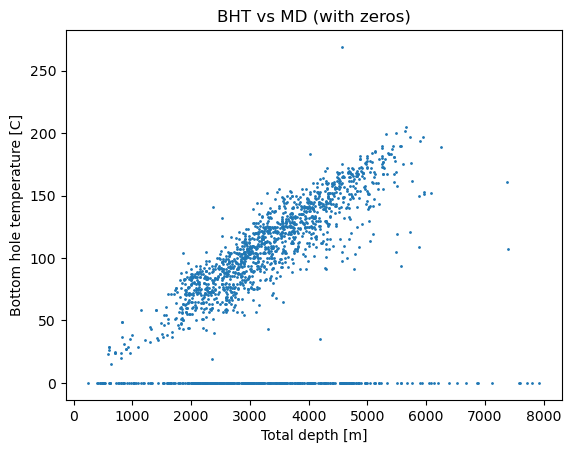

In [9]:
pd.read_sql_query(
    "SELECT wlbBottomHoleTemperature, wlbTotalDepth\
    FROM wells_data\
    WHERE wlbBottomHoleTemperature>=0;",
    con=engine2
).plot.scatter(
    x='wlbTotalDepth',
    y='wlbBottomHoleTemperature',
    s=1,
    title='BHT vs MD (with zeros)',
    xlabel='Total depth [m]',
    ylabel='Bottom hole temperature [C]'
).get_figure().savefig('output/BHT_vs_MD_(with_zeros)')

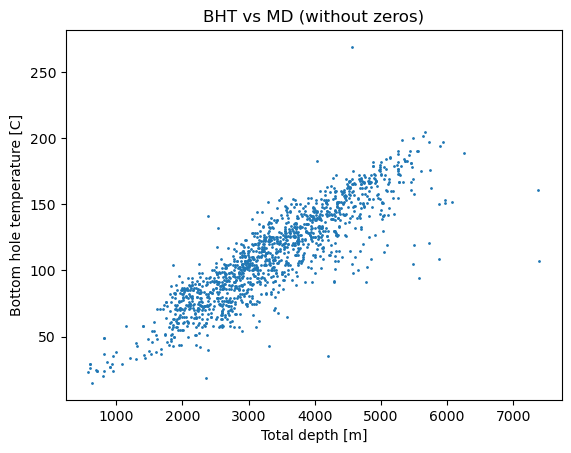

In [10]:
pd.read_sql_query(
    "SELECT wlbBottomHoleTemperature, wlbTotalDepth\
    FROM wells_data\
    WHERE wlbBottomHoleTemperature>0;",
    con=engine2
).plot.scatter(
    x='wlbTotalDepth',
    y='wlbBottomHoleTemperature',
    s=1,
    title='BHT vs MD (without zeros)',
    xlabel='Total depth [m]',
    ylabel='Bottom hole temperature [C]'
).get_figure().savefig('output/BHT_vs_MD_(without_zeros)')

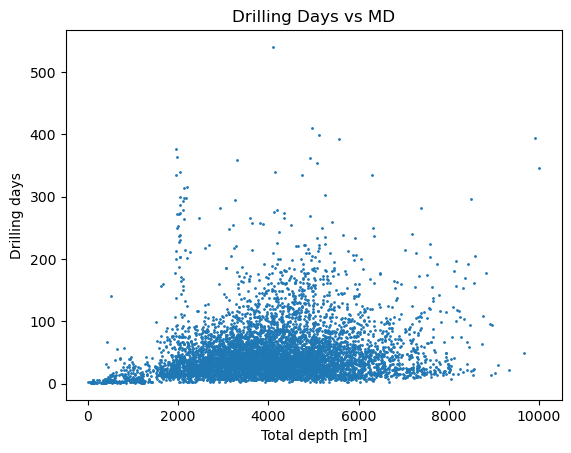

In [11]:
pd.read_sql_query(
    "SELECT wlbDrillingDays, wlbTotalDepth\
    FROM wells_data\
    WHERE wlbDrillingDays>0 and wlbDrillingDays<800;",
    con=engine2
).plot.scatter(
    x='wlbTotalDepth',
    y='wlbDrillingDays',
    s=1,
    title='Drilling Days vs MD',
    xlabel='Total depth [m]',
    ylabel='Drilling days'
).get_figure().savefig('output/drilling_days_vs_MD')

In [12]:
pd.read_sql_query(
    "SELECT wlbAgeAtTd, wlbTotalDepth\
    FROM wells_data\
    WHERE wlbAgeAtTd is not null;",
    con=engine2
).groupby('wlbAgeAtTd').mean().sort_values(by='wlbTotalDepth', axis=0, ascending=True)

,wlbTotalDepth
wlbAgeAtTd,
QUATERNARY,471.500000
MIDDLE CARBONIFEROUS,509.000000
LATE PLIOCENE,713.000000
PLIOCENE,822.750000
MIOCENE,1061.866667
OLIGOCENE,1267.800000
EARLY CARBONIFEROUS,1767.666667
SILURIAN,1950.000000
PLEISTOCENE,2069.000000


Production Data :

1. Make a plot with the monthly production data (Oil, Gas and Water) of the `7405` NPDCode Volve according to the time. You will need to add and `monthly` column, create by concatenating the `Year` and the `Month` columns; Plot: vertical axis: the 3 productions (Oil, Gas and Water) and horizontal axis: the month and the year (ex: 2020-01).

2. Calculate the sum of the Oil production by Volve.

In [13]:
df_monthly_prod.head(5)

,Wellbore name,NPDCode,Year,Month,On Stream (hrs),Oil (Sm3),Gas (Sm3),Water (Sm3),GI (Sm3),WI (Sm3)
0,15/9-F-1 C,7405,2014,4,227.50000,11142.47,1597936.65,0.00,NaN,NaN
1,15/9-F-1 C,7405,2014,5,733.83334,24901.95,3496229.65,783.48,NaN,NaN
2,15/9-F-1 C,7405,2014,6,705.91666,19617.76,2886661.69,2068.48,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.41666,15085.68,2249365.75,6243.98,NaN,NaN
4,15/9-F-1 C,7405,2014,8,432.99166,6970.43,1048190.80,4529.75,NaN,NaN


In [15]:
df_monthly_prod['day'] = 1
df_monthly_prod.index = (pd.DatetimeIndex(data=pd.to_datetime(df_monthly_prod[["Year", "Month", 'day']]), freq=None))
df_monthly_prod.head(5)

,Wellbore name,NPDCode,Year,Month,On Stream (hrs),Oil (Sm3),Gas (Sm3),Water (Sm3),GI (Sm3),WI (Sm3),day
2014-04-01,15/9-F-1 C,7405,2014,4,227.50000,11142.47,1597936.65,0.00,NaN,NaN,1
2014-05-01,15/9-F-1 C,7405,2014,5,733.83334,24901.95,3496229.65,783.48,NaN,NaN,1
2014-06-01,15/9-F-1 C,7405,2014,6,705.91666,19617.76,2886661.69,2068.48,NaN,NaN,1
2014-07-01,15/9-F-1 C,7405,2014,7,742.41666,15085.68,2249365.75,6243.98,NaN,NaN,1
2014-08-01,15/9-F-1 C,7405,2014,8,432.99166,6970.43,1048190.80,4529.75,NaN,NaN,1


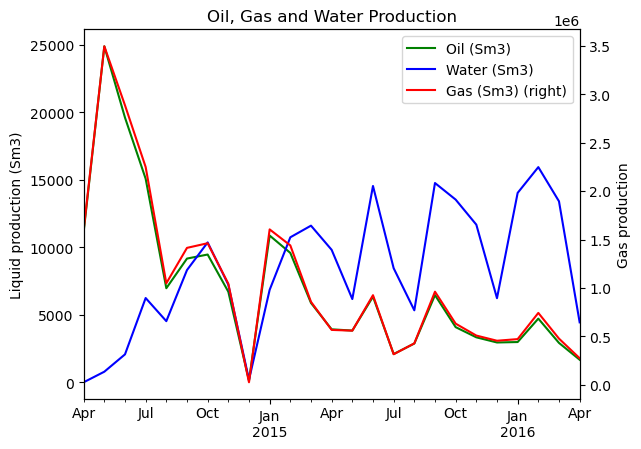

In [41]:
filter1 = df_monthly_prod['NPDCode']==7405
df_monthly_prod[filter1][['Oil (Sm3)', 'Gas (Sm3)', 'Water (Sm3)']].plot(
    y=['Oil (Sm3)', 'Water (Sm3)'],
    kind='line',
    color=['green', 'blue'],
    title='Oil, Gas and Water Production',
    ylabel='Liquid production (Sm3)'
)
df_monthly_prod[filter1]['Gas (Sm3)'].plot(
    secondary_y=True,
    color='red',
    ylabel='Gas production',
    legend=True
).get_figure().savefig('output/production_graph.png')
plt.show()

In [ ]:
print(f'The sum of the oil production in km3 (1000m3) is {df_monthly_prod['Oil (Sm3)'].sum()/1000}')


The sum of the oil production in km3 (1000m3) is 10037.080609999999


Merged Data :

1. Create 2 new dataframes:

    1. `partial_wells_data` from `wells_data` by keeping only `wlbTotalDepthcolumns` and the common column;

    2. `partial_mpd` from `monthly_production_data` (`mpd`) by keeping only `Oil`, `Gas` `Water` and the common column and making a sum aggregation grouping by the common column;

2. Merge both dataframes as `merged_data`;

3. Make a scatter plot of the pil production (vertical axis) according to the total depth (horizontal axis). Is there a correlation between the depth and the production?

In [59]:
df_monthly_prod.head(5)

,Wellbore name,NPDCode,Year,Month,On Stream (hrs),Oil (Sm3),Gas (Sm3),Water (Sm3),GI (Sm3),WI (Sm3),day
2014-04-01,15/9-F-1 C,7405,2014,4,227.50000,11142.47,1597936.65,0.00,NaN,NaN,1
2014-05-01,15/9-F-1 C,7405,2014,5,733.83334,24901.95,3496229.65,783.48,NaN,NaN,1
2014-06-01,15/9-F-1 C,7405,2014,6,705.91666,19617.76,2886661.69,2068.48,NaN,NaN,1
2014-07-01,15/9-F-1 C,7405,2014,7,742.41666,15085.68,2249365.75,6243.98,NaN,NaN,1
2014-08-01,15/9-F-1 C,7405,2014,8,432.99166,6970.43,1048190.80,4529.75,NaN,NaN,1


In [116]:
partial_wells_data = pd.DataFrame(df_wells[['wlbNpdidWellbore', 'wlbTotalDepth']])
partial_mpd = pd.DataFrame(df_monthly_prod[['NPDCode', 'Oil (Sm3)', 'Gas (Sm3)', 'Water (Sm3)']]).groupby('NPDCode').sum()
merged_data = pd.merge(
    left=partial_mpd,
    right=partial_wells_data,
    how='left',
    left_on='NPDCode',
    right_on='wlbNpdidWellbore'
)
merged_data.set_index('wlbNpdidWellbore', inplace=True)
merged_data.index.name = 'NPD_id'
merged_data.rename(columns={'wlbTotalDepth': 'TotalDepth'}, inplace=True)
merged_data['GOR'] = merged_data['Gas (Sm3)'] / merged_data['Oil (Sm3)']
merged_data['WGR'] = merged_data['Water (Sm3)'] / merged_data['Gas (Sm3)']

In [117]:
df_monthly_prod['date'] = pd.to_datetime(df_monthly_prod[["Year", "Month", 'day']])
df_monthly_prod[df_monthly_prod['On Stream (hrs)']>0].groupby('NPDCode').count()

,Wellbore name,Year,Month,On Stream (hrs),Oil (Sm3),Gas (Sm3),Water (Sm3),GI (Sm3),WI (Sm3),day,date
NPDCode,,,,,,,,,,,
5351,97,97,97,97,97,97,97,0,0,97,97
5599,102,102,102,102,102,102,102,0,0,102,102
5693,102,102,102,102,0,0,0,0,102,102,102
5769,97,97,97,97,5,5,5,0,96,97,97
7078,39,39,39,39,39,39,39,0,0,39,39
7289,30,30,30,30,30,30,30,0,0,30,30
7405,25,25,25,25,25,25,25,0,0,25,25


There are 2 injector wells (5693 and 5769) and 2 ranges of production time: more than 90 months and less than 40 months. This will affect the sum of the oil.

In [118]:
merged_data

,Oil (Sm3),Gas (Sm3),Water (Sm3),TotalDepth,GOR,WGR
NPD_id,,,,,,
5351,3942233.39,5.780095e+08,7121249.74,3750.0,146.619818,0.012320
5599,4579609.55,6.675423e+08,6833320.37,3520.0,145.764016,0.010237
5693,0.00,0.000000e+00,0.00,3510.0,NaN,NaN
5769,41160.68,6.561826e+06,13533.18,3792.0,159.419760,0.002062
7078,1147849.10,1.743105e+08,1090806.27,4562.0,151.858394,0.006258
7289,148518.56,2.250535e+07,52366.40,4685.0,151.532246,0.002327
7405,177709.33,2.644092e+07,207302.39,4094.0,148.787453,0.007840


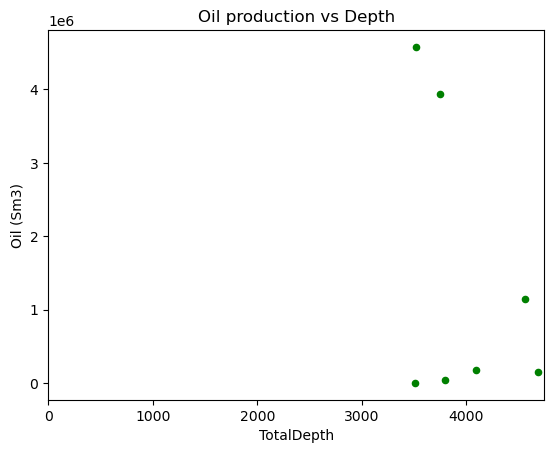

In [122]:
merged_data.plot(
    x='TotalDepth',
    y='Oil (Sm3)',
    kind='scatter',
    title='Oil production vs Depth',
    color='green',
    xlim=(0, None)
).get_figure().savefig('output/oil_prod_vs_depth')

There isn't a correlation because the 2 wells that have produced more than 3 MMm3 had more production time than the rest. There is a particular case with the 5769 well that had a lot of active time but mostly as a water injection well, so despite having a great amount of active time, the oil produce is the lowest.